In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Required installations and downloads

#Download Java
!apt-get install openjdk-8-jdk-headless

#Download Apache Spark and Hadoop
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

#Install findspark library
!pip install -q findspark

#Install pycountry-convert 0.7.2 package
!pip install pycountry-convert==0.7.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u402-ga-2ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-05-14 20:02:16--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.1’

spark-3.2.1-bin-had 100%[===================>] 260.01M  10.3MB/s    in 27s     

2024-05-14 20:02:44 (9.74 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.1’ saved [272637746/272637746]



In [ ]:
#Required imports
import os

import findspark

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PySpark (Python API for Apache Spark) - Set Up

In [ ]:
#Unzip folder
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
#Set environment path to run PySpark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
#To locate Spark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
#Required PySpark imports
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pycountry_convert import country_alpha2_to_continent_code
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import pyspark.sql.functions as F
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col, when

In [ ]:
#Create SparkSession - entry point to Spark
spark = SparkSession.builder\
  .master("local")\
  .appName("Assessment")\
  .config('spark.ui.port', '4050')\
  .getOrCreate()

In [ ]:
#Print Spark Session variable
spark

# Data Loading

### Flamingo Data

In [ ]:
ad_clicks_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)

In [ ]:
buy_clicks_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

In [ ]:
game_clicks_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/game-clicks.csv", header=True, inferSchema=True)

In [ ]:
level_events_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/level-events.csv", header=True, inferSchema=True)

In [ ]:
team_assignments_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/team-assignments.csv", header=True, inferSchema=True)

In [ ]:
team_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/team.csv", header=True, inferSchema=True)

In [ ]:
user_session_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/user-session.csv", header=True, inferSchema=True)

In [ ]:
users_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/flamingo-data/users.csv", header=True, inferSchema=True)

### Chat Data

In [ ]:
create_team_chat_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/chat-data/chat_create_team_chat.csv", header=True, inferSchema=True)

In [ ]:
item_team_chat_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/chat-data/chat_item_team_chat.csv", header=True, inferSchema=True)

In [ ]:
join_team_chat_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/chat-data/chat_join_team_chat.csv", header=True, inferSchema=True)

In [ ]:
leave_team_chat_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/chat-data/chat_leave_team_chat.csv", header=True, inferSchema=True)

In [ ]:
mention_team_chat_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/chat-data/chat_mention_team_chat.csv", header=True, inferSchema=True)

In [ ]:
respond_team_chat_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/CMP7203 Big Data Management/Catch-Pink-Flamingo-Game Dataset/chat-data/chat_respond_team_chat.csv", header=True, inferSchema=True)

# Exploratory Data Analysis

## EDA on Flamingo Data

### EDA on ad_clicks_df

In [ ]:
#Check schema of dataframe
ad_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- adId: integer (nullable = true)
 |-- adCategory: string (nullable = true)



In [ ]:
#Show top 5 rows of ad_clicks_df dataframe
ad_clicks_df.show(5)

+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
+-------------------+----+-------------+------+------+----+-----------+
only showing top 5 rows



In [ ]:
#Convert ad_clicks_df to Pandas dataframe for visualisations
ad_clicks_pd_df = ad_clicks_df.toPandas()

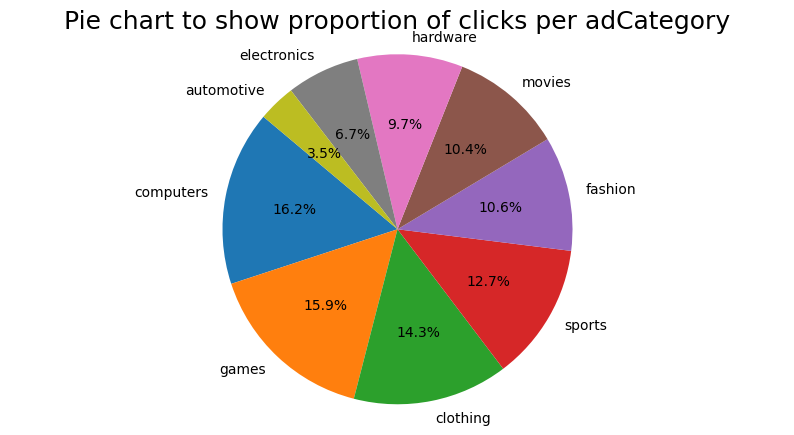

In [ ]:
#Function to display a pie chart representation adCategory
def items_piechart(data):
  item_counts = data['adCategory'].value_counts()
  plt.figure(figsize=(10,5))
  plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title("Pie chart to show proportion of clicks per adCategory",fontsize=18)
  plt.axis('equal')
  plt.show()

items_piechart(ad_clicks_pd_df)

### EDA on buy_clicks_df

In [ ]:
#Check schema of dataframe
buy_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [ ]:
#Show top 5 rows of buy_clicks_df dataframe
buy_clicks_df.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



In [ ]:
#Convert buy_clicks_df to Pandas dataframe for visualisations
buy_clicks_pd_df = buy_clicks_df.toPandas()

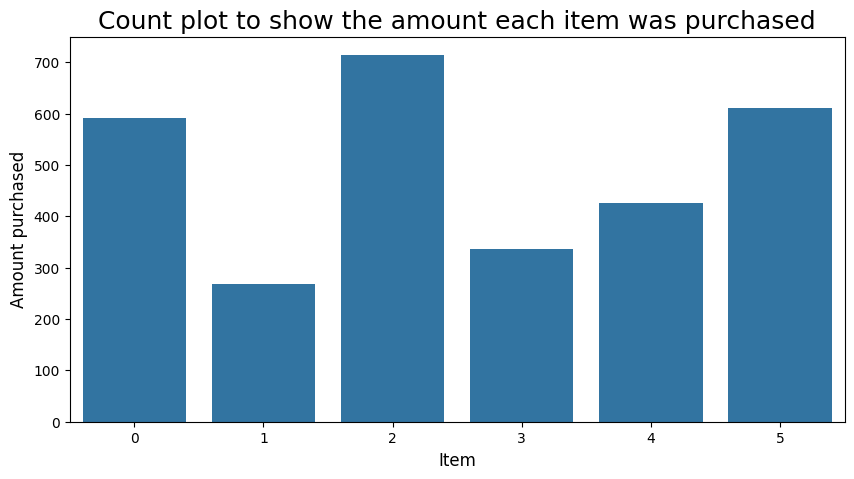

In [ ]:
#Function to display a count plot representation of the amount each item was purchased
def items_countplot(data):
  plt.figure(figsize=(10,5))
  sns.countplot(x=data["buyId"], data=data)
  plt.title("Count plot to show the amount each item was purchased",fontsize=18)
  plt.xlabel("Item",fontsize=12)
  plt.ylabel("Amount purchased",fontsize=12)
  plt.show()

items_countplot(buy_clicks_pd_df)

### EDA on game_clicks_df

In [ ]:
#Check schema of dataframe
game_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- clickId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- isHit: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- teamLevel: integer (nullable = true)



In [ ]:
#Show top 5 rows of game_clicks_df dataframe
game_clicks_df.show(5)

+-------------------+-------+------+-------------+-----+------+---------+
|          timestamp|clickId|userId|userSessionId|isHit|teamId|teamLevel|
+-------------------+-------+------+-------------+-----+------+---------+
|2016-05-26 15:06:55|    105|  1038|         5916|    0|    25|        1|
|2016-05-26 15:07:09|    154|  1099|         5898|    0|    44|        1|
|2016-05-26 15:07:14|    229|   899|         5757|    0|    71|        1|
|2016-05-26 15:07:14|    322|  2197|         5854|    0|    99|        1|
|2016-05-26 15:07:20|     22|  1362|         5739|    0|    13|        1|
+-------------------+-------+------+-------------+-----+------+---------+
only showing top 5 rows



In [ ]:
#Convert game_clicks_df to Pandas dataframe for visualisations
game_clicks_pd_df = game_clicks_df.toPandas()

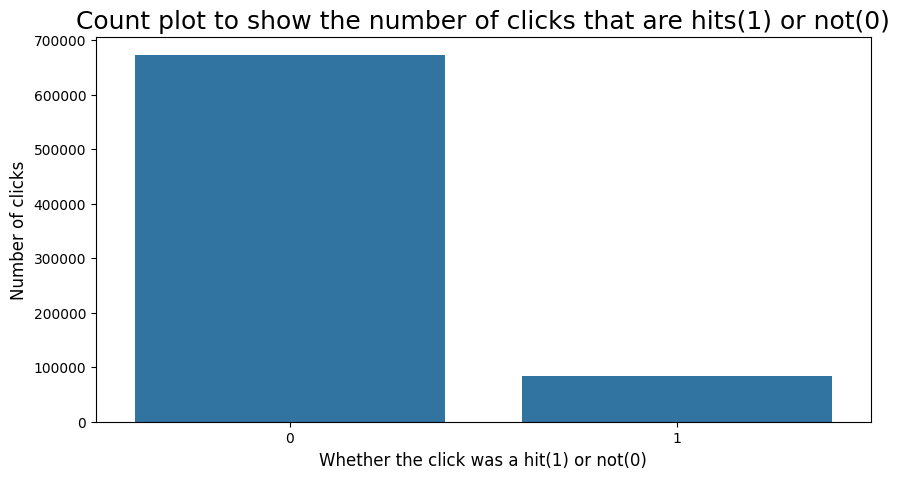

In [ ]:
#Function to display a count plot showing the number of clicks that are hits(1) or not(0)
def hit_countplot(data):
  plt.figure(figsize=(10,5))
  sns.countplot(x=data["isHit"], data=data)
  plt.title("Count plot to show the number of clicks that are hits(1) or not(0)",fontsize=18)
  plt.xlabel("Whether the click was a hit(1) or not(0)",fontsize=12)
  plt.ylabel("Number of clicks",fontsize=12)
  plt.show()

hit_countplot(game_clicks_pd_df)

### EDA on level_events_df

In [ ]:
#Check schema of dataframe
level_events_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- eventId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- eventType: string (nullable = true)



In [ ]:
#Show top 5 rows of level_events_df dataframe
level_events_df.show(5)

+-------------------+-------+------+---------+---------+
|          timestamp|eventId|teamId|teamLevel|eventType|
+-------------------+-------+------+---------+---------+
|2016-05-27 23:06:54|      0|     2|        1|      end|
|2016-05-27 23:06:54|      1|     2|        2|    start|
|2016-05-27 23:06:54|      2|     8|        1|      end|
|2016-05-27 23:06:54|      3|     8|        2|    start|
|2016-05-27 23:06:54|      4|     9|        1|      end|
+-------------------+-------+------+---------+---------+
only showing top 5 rows



### EDA on team_assignments_df

In [ ]:
#Check schema of dataframe
team_assignments_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- assignmentId: integer (nullable = true)



In [ ]:
#Show top 5 rows of team_assignments_df dataframe
team_assignments_df.show(5)

+-------------------+----+------+------------+
|          timestamp|team|userId|assignmentId|
+-------------------+----+------+------------+
|2016-05-26 14:06:54|  64|   504|        5439|
|2016-05-26 14:07:00|  39|  1698|        5301|
|2016-05-26 14:07:04|  85|    81|        5540|
|2016-05-26 14:07:08|  95|  1976|        5307|
|2016-05-26 14:07:09|  97|  1009|        5368|
+-------------------+----+------+------------+
only showing top 5 rows



### EDA on team_df

In [ ]:
#Check schema of dataframe
team_df.printSchema()

root
 |-- teamId: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- teamCreationTime: string (nullable = true)
 |-- teamEndTime: string (nullable = true)
 |-- strength: double (nullable = true)
 |-- currentLevel: integer (nullable = true)



In [ ]:
#Show top 5 rows of team_df dataframe
team_df.show(5)

+------+----------+-------------------+-------------------+--------------+------------+
|teamId|      name|   teamCreationTime|        teamEndTime|      strength|currentLevel|
+------+----------+-------------------+-------------------+--------------+------------+
|    79|   O1uJX7C|2016-06-12 15:33:27|9999-12-31 23:59:59|0.774473575316|           1|
|    92|  WeLHp8HZ|2016-06-12 21:54:20|9999-12-31 23:59:59| 0.17192602642|           1|
|     6|    mARlfz|2016-06-12 23:02:16|9999-12-31 23:59:59|0.537353043526|           1|
|     7|xO41jlAo0Y|2016-06-13 06:03:03|9999-12-31 23:59:59|0.394370370549|           1|
|    40|   vdwO0k1|2016-06-13 07:01:03|9999-12-31 23:59:59|0.706832959169|           1|
+------+----------+-------------------+-------------------+--------------+------------+
only showing top 5 rows



### EDA on user_session_df

In [ ]:
#Check schema of dataframe
user_session_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- assignmentId: integer (nullable = true)
 |-- sessionType: string (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- platformType: string (nullable = true)



In [ ]:
#Show top 5 rows of user_session_df dataframe
user_session_df.show(5)

+-------------------+-------------+------+------+------------+-----------+---------+------------+
|          timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|
+-------------------+-------------+------+------+------------+-----------+---------+------------+
|2016-05-26 14:47:30|         5675|   170|    90|        5423|      start|        1|      iphone|
|2016-05-27 00:06:54|         5675|   170|    90|        5423|        end|        1|      iphone|
|2016-05-26 14:43:09|         5795|   835|    39|        5300|      start|        1|     android|
|2016-05-27 08:06:54|         5795|   835|    39|        5300|        end|        1|     android|
|2016-05-26 14:47:20|         5833|   624|     2|        5529|      start|        1|      iphone|
+-------------------+-------------+------+------+------------+-----------+---------+------------+
only showing top 5 rows



In [ ]:
#Convert user_session_df to Pandas dataframe for visualisations
user_session_pd_df = user_session_df.toPandas()

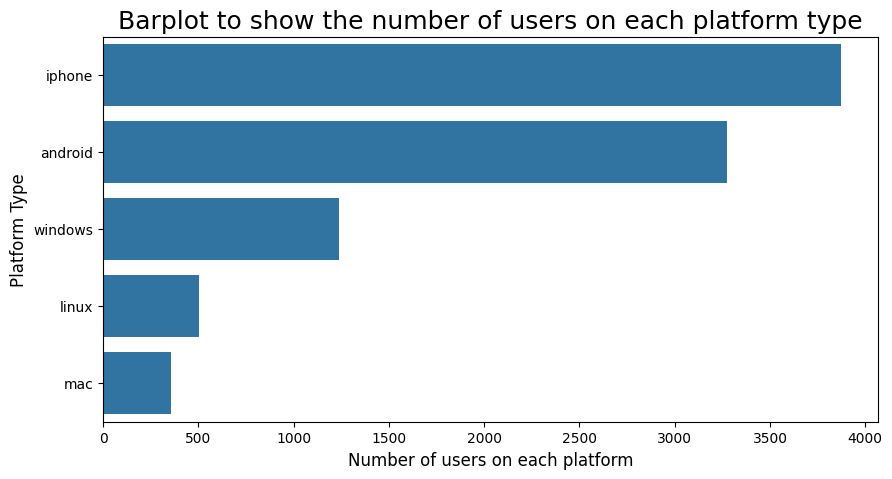

In [ ]:
#Function to display a bar plot representation of platformType
def platformType_barplot(data):
  plt.figure(figsize=(10,5))
  sns.barplot(x=data["platformType"].value_counts().values[0:10],
              y=data["platformType"].value_counts().index[0:10]);
  plt.title("Barplot to show the number of users on each platform type",fontsize=18)
  plt.xlabel("Number of users on each platform",fontsize=12)
  plt.ylabel("Platform Type",fontsize=12)
  plt.show()

platformType_barplot(user_session_pd_df)

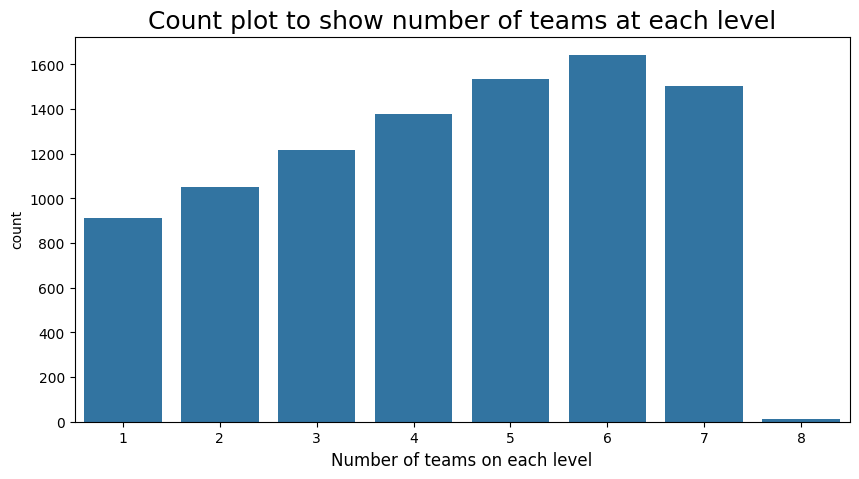

In [ ]:
#Function to display a count plot representation of number of teams at each level
def levels_countplot(data):
  plt.figure(figsize=(10,5))
  sns.countplot(x=data["teamLevel"], data=data)
  plt.title("Count plot to show number of teams at each level",fontsize=18)
  plt.xlabel("Number of teams on each level",fontsize=12)
  plt.show()

levels_countplot(user_session_pd_df)

### EDA on users_df

In [ ]:
#Check schema of dataframe
users_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- userId: integer (nullable = true)
 |-- nick: string (nullable = true)
 |-- twitter: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- country: string (nullable = true)



In [ ]:
#Show top 5 rows of users_df dataframe
users_df.show(5)

+-------------------+------+-----------+--------+----------+-------+
|          timestamp|userId|       nick| twitter|       dob|country|
+-------------------+------+-----------+--------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC|
+-------------------+------+-----------+--------+----------+-------+
only showing top 5 rows



In [ ]:
#Convert users_df to Pandas dataframe for visualisations
users_pd_df = users_df.toPandas()

In [ ]:
#Extracting dob and converting to datetime
users_pd_df['dob'] = pd.to_datetime(users_pd_df['dob'], format='mixed', errors='coerce')

#Extracting the year from dob
users_pd_df['dob'] = users_pd_df['dob'].dt.year
dob_df = users_pd_df['dob']

#Createing a DataFrame from the list
dob_df = spark.createDataFrame([(value,) for value in dob_df], ["year"])

#Grouping by year and count occurrences
grouped_df = dob_df.groupBy("year").count().orderBy("year")

#Converting Spark DataFrame to Pandas DataFrame
pandas_df = grouped_df.toPandas()

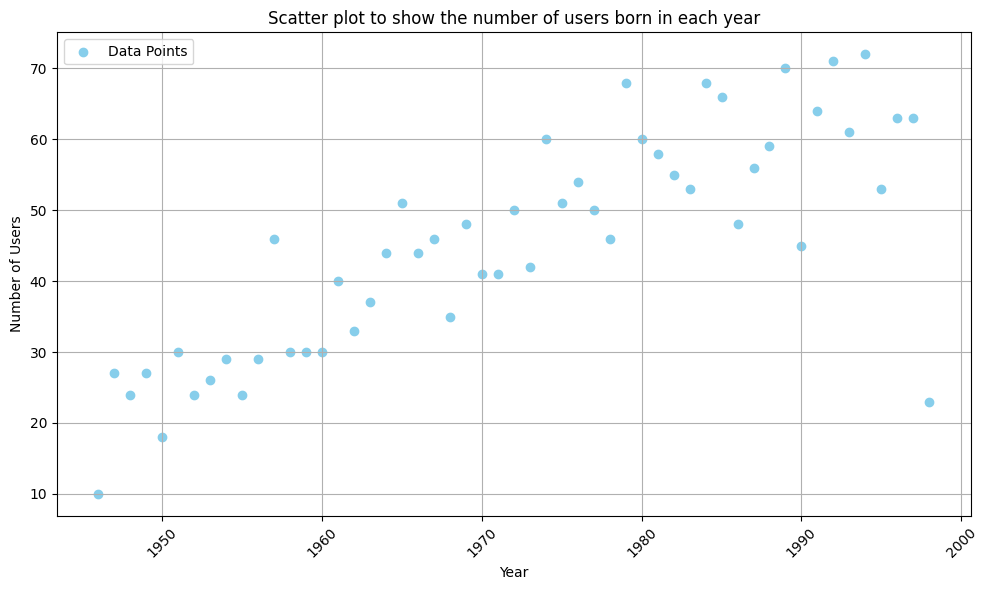

In [ ]:
#Plotting the number of users born in each year
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["year"], pandas_df["count"], color='skyblue', label='Data Points')
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.title("Scatter plot to show the number of users born in each year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## EDA on Chat Data

### EDA on create_team_chat_df

In [ ]:
#Count number of rows
create_team_chat_df.count()

126

In [ ]:
#Check schema of dataframe
create_team_chat_df.printSchema()

root
 |-- 1588: integer (nullable = true)
 |-- 177: integer (nullable = true)
 |-- 6776: integer (nullable = true)
 |-- 1464233999.0: double (nullable = true)



In [ ]:
#Show top 5 rows of create_team_chat_df dataframe
create_team_chat_df.show(5)

+----+---+----+-------------+
|1588|177|6776| 1464233999.0|
+----+---+----+-------------+
| 350|188|6777|   1.464234E9|
| 740| 81|6778|1.464234001E9|
|1068| 66|6779|1.464234002E9|
|1554| 52|6780|1.464234003E9|
| 668| 89|6781|1.464234004E9|
+----+---+----+-------------+
only showing top 5 rows



### EDA on item_team_chat_df

In [ ]:
#Count number of rows
item_team_chat_df.count()

44412

In [ ]:
#Check schema of dataframe
item_team_chat_df.printSchema()

root
 |-- 1754: integer (nullable = true)
 |-- 6810: integer (nullable = true)
 |-- 6812: integer (nullable = true)
 |-- 1464235803.0: double (nullable = true)



In [ ]:
#Show top 5 rows of item_team_chat_df dataframe
item_team_chat_df.show(5)

+----+----+----+-------------+
|1754|6810|6812| 1464235803.0|
+----+----+----+-------------+
|1847|6779|6824|1.464235815E9|
|1349|6792|6840|1.464237603E9|
|  63|6784|6861|1.464239411E9|
|1125|6792|6864|1.464239414E9|
| 192|6796|6865|1.464239415E9|
+----+----+----+-------------+
only showing top 5 rows



### EDA on join_team_chat_df

In [ ]:
#Count number of rows
join_team_chat_df.count()

4000

In [ ]:
#Check schema of dataframe
join_team_chat_df.printSchema()

root
 |-- 1588: integer (nullable = true)
 |-- 6776: integer (nullable = true)
 |-- 1464233999.0: double (nullable = true)



In [ ]:
#Show top 5 rows of join_team_chat_df dataframe
join_team_chat_df.show(5)

+----+----+-------------+
|1588|6776| 1464233999.0|
+----+----+-------------+
| 350|6777|   1.464234E9|
| 740|6778|1.464234001E9|
|1068|6779|1.464234002E9|
|1554|6780|1.464234003E9|
| 668|6781|1.464234004E9|
+----+----+-------------+
only showing top 5 rows



### EDA on leave_team_chat_df

In [ ]:
#Count number of rows
leave_team_chat_df.count()

3263

In [ ]:
#Check schema of dataframe
leave_team_chat_df.printSchema()

root
 |-- 1244: integer (nullable = true)
 |-- 6821: integer (nullable = true)
 |-- 1464241204.0: double (nullable = true)



In [ ]:
#Show top 5 rows of leave_team_chat_df dataframe
leave_team_chat_df.show(5)

+----+----+-------------+
|1244|6821| 1464241204.0|
+----+----+-------------+
|1074|6838|1.464243024E9|
| 350|6777|1.464246654E9|
|1349|6792|1.464248401E9|
|1219|6854|1.464248403E9|
|1398|6780|1.464248416E9|
+----+----+-------------+
only showing top 5 rows



### EDA on mention_team_chat_df

In [ ]:
#Count number of rows
mention_team_chat_df .count()

11083

In [ ]:
#Check schema of dataframe
mention_team_chat_df .printSchema()

root
 |-- 6824: integer (nullable = true)
 |-- 1847: integer (nullable = true)
 |-- 1464235815.0: double (nullable = true)



In [ ]:
#Show top 5 rows of mention_team_chat_df  dataframe
mention_team_chat_df.show(5)

+----+----+-------------+
|6824|1847| 1464235815.0|
+----+----+-------------+
|6865| 789|1.464239415E9|
|6906| 518|1.464243003E9|
|6934| 240|1.464243031E9|
|6968|1482|1.464244803E9|
|6976|1792|1.464244811E9|
+----+----+-------------+
only showing top 5 rows



### EDA on respond_team_chat_df

In [ ]:
#Count number of rows
respond_team_chat_df .count()

11072

In [ ]:
#Check schema of dataframe
respond_team_chat_df .printSchema()

root
 |-- 6934: integer (nullable = true)
 |-- 6928: integer (nullable = true)
 |-- 1464243031.0: double (nullable = true)



In [ ]:
#Show top 5 rows of respond_team_chat_df  dataframe
respond_team_chat_df.show(5)

+----+----+-------------+
|6934|6928| 1464243031.0|
+----+----+-------------+
|6950|6865|1.464243047E9|
|6955|6935|1.464243052E9|
|6967|6935|1.464244802E9|
|6980|6977|1.464244815E9|
|6993|6906|1.464244828E9|
+----+----+-------------+
only showing top 5 rows



# Data Pre-processing

## Data Integration

Integrating the two dataframes that will be used.

In [ ]:
#Merging the two files
combined_df = users_df.join(user_session_df, "userId")

In [ ]:
#Viewing the combined file
combined_df.show()

+------+-------------------+-----------+----------+----------+-------+-------------------+-------------+------+------------+-----------+---------+------------+
|userId|          timestamp|       nick|   twitter|       dob|country|          timestamp|userSessionId|teamId|assignmentId|sessionType|teamLevel|platformType|
+------+-------------------+-----------+----------+----------+-------+-------------------+-------------+------+------------+-----------+---------+------------+
|   170|2016-02-13 15:04:42| HmV6dJIAjP|   @ejgBLF|1973-07-03|     ST|2016-05-26 14:47:30|         5675|    90|        5423|      start|        1|      iphone|
|   170|2016-02-13 15:04:42| HmV6dJIAjP|   @ejgBLF|1973-07-03|     ST|2016-05-27 00:06:54|         5675|    90|        5423|        end|        1|      iphone|
|   835|2013-04-07 15:39:25|  qtM5nk5Wt| @Fj5s1Mb9|1991-03-02|     LT|2016-05-26 14:43:09|         5795|    39|        5300|      start|        1|     android|
|   835|2013-04-07 15:39:25|  qtM5nk5Wt|

## Data Cleaning

Cleaning the combined_df of duplicate userSessionIds and dropping unrequired columns.

In [ ]:
#Dropping duplicate userSessionIds
combined_df = combined_df.dropDuplicates(['userSessionId']).orderBy('userSessionId')
combined_df.show()

+------+-------------------+-----------+----------+----------+-------+-------------------+-------------+------+------------+-----------+---------+------------+
|userId|          timestamp|       nick|   twitter|       dob|country|          timestamp|userSessionId|teamId|assignmentId|sessionType|teamLevel|platformType|
+------+-------------------+-----------+----------+----------+-------+-------------------+-------------+------+------------+-----------+---------+------------+
|   812|2012-08-07 22:46:47|  JIEpxpte7|    @ueZSj|1958-04-28|     DO|2016-05-26 15:01:14|         5648|    36|        5242|      start|        1|     android|
|  1658|2014-05-25 20:36:33| VBAoAoPXtp|    @74pik|1977-03-29|     VE|2016-05-26 14:39:49|         5649|    18|        5226|      start|        1|      iphone|
|  1589|2015-02-11 04:59:11|  4TzxDS3uw|   @uwCWvl|1959-10-30|     LT|2016-05-26 15:05:08|         5650|    22|        5589|      start|        1|      iphone|
|  1863|2012-12-27 16:31:30| m8JxfgGVHU|

In [ ]:
#Counting the number of records in the dataframe
combined_df.select('userSessionId').count()

4625

In [ ]:
#Dropping unrequired columns to remove redundant data
combined_df = combined_df.drop('userId','timestamp','nick','twitter', 'timestamp','userSessionId','teamId','assignmentId','sessionType')

In [ ]:
#Data frame after all data cleaning has been applied
combined_df.show()

+----------+-------+---------+------------+
|       dob|country|teamLevel|platformType|
+----------+-------+---------+------------+
|1958-04-28|     DO|        1|     android|
|1977-03-29|     VE|        1|      iphone|
|1959-10-30|     LT|        1|      iphone|
|1988-05-01|     PK|        1|     android|
|1967-03-18|     ZM|        1|     android|
|1956-12-21|     GT|        1|     android|
|1971-11-26|     AT|        1|      iphone|
|1969-10-08|     MR|        1|     windows|
|1994-01-07|     AO|        1|     android|
|1983-07-29|     BB|        1|      iphone|
|1962-06-08|     MN|        1|      iphone|
|1947-11-02|     SV|        1|      iphone|
|1982-05-01|     RO|        1|      iphone|
|1987-09-04|     GF|        1|     android|
|1969-02-16|     SO|        1|     android|
|1970-04-26|     BV|        1|      iphone|
|1961-07-16|     IL|        1|     android|
|1964-10-04|     UY|        1|     android|
|1959-07-21|     PH|        1|     android|
|1972-09-25|     RS|        1|  

## Data Transformations
Grouping Platform Type Categories

In [ ]:
#List of platform values to replace
platforms_to_replace = ['windows', 'linux', 'mac']

In [ ]:
#Updating values in the 'platformType' column
platform_groups_df = combined_df.withColumn('platformType', when(col('platformType').isin(platforms_to_replace), 'desktop').otherwise(col('platformType')))

In [ ]:
#Selecting to show the unique values in the platformType column
platform_groups_df.select('platformType').distinct().show()

+------------+
|platformType|
+------------+
|      iphone|
|     android|
|     desktop|
+------------+



In [ ]:
#Assigning the transformed dataframe back to combined_df and showing it
combined_df = platform_groups_df
combined_df.show()

+----------+-------+---------+------------+
|       dob|country|teamLevel|platformType|
+----------+-------+---------+------------+
|1958-04-28|     DO|        1|     android|
|1977-03-29|     VE|        1|      iphone|
|1959-10-30|     LT|        1|      iphone|
|1988-05-01|     PK|        1|     android|
|1967-03-18|     ZM|        1|     android|
|1956-12-21|     GT|        1|     android|
|1971-11-26|     AT|        1|      iphone|
|1969-10-08|     MR|        1|     desktop|
|1994-01-07|     AO|        1|     android|
|1983-07-29|     BB|        1|      iphone|
|1962-06-08|     MN|        1|      iphone|
|1947-11-02|     SV|        1|      iphone|
|1982-05-01|     RO|        1|      iphone|
|1987-09-04|     GF|        1|     android|
|1969-02-16|     SO|        1|     android|
|1970-04-26|     BV|        1|      iphone|
|1961-07-16|     IL|        1|     android|
|1964-10-04|     UY|        1|     android|
|1959-07-21|     PH|        1|     android|
|1972-09-25|     RS|        1|  

## Feature Engineering

### Calculating Age
Extracting year From dob Column

Feature engineering was performed to extract the date from the dob column. The year was then used to calculate users' ages.

In [ ]:
#Splitting dob string to extract year only
combined_df = combined_df.withColumn('dob', split(combined_df.dob, '-').getItem(0))

#Converting dob column, of string data type to integer data type
combined_df = combined_df.withColumn('dob', combined_df['dob'].cast(IntegerType()))

#Calculating users' ages based on extracted year, at the time the dataset was collected
combined_df = combined_df.withColumn("age", 2016 - col("dob"))

#Dropping dob column
combined_df = combined_df.drop("dob")

In [ ]:
#Printing the schema of the dataframe show that the age column is an integer
combined_df.printSchema()

root
 |-- country: string (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- platformType: string (nullable = true)
 |-- age: integer (nullable = true)



In [ ]:
#Viewing the dataframe with the new age column added
combined_df.show()

+-------+---------+------------+---+
|country|teamLevel|platformType|age|
+-------+---------+------------+---+
|     DO|        1|     android| 58|
|     VE|        1|      iphone| 39|
|     LT|        1|      iphone| 57|
|     PK|        1|     android| 28|
|     ZM|        1|     android| 49|
|     GT|        1|     android| 60|
|     AT|        1|      iphone| 45|
|     MR|        1|     desktop| 47|
|     AO|        1|     android| 22|
|     BB|        1|      iphone| 33|
|     MN|        1|      iphone| 54|
|     SV|        1|      iphone| 69|
|     RO|        1|      iphone| 34|
|     GF|        1|     android| 29|
|     SO|        1|     android| 47|
|     BV|        1|      iphone| 46|
|     IL|        1|     android| 55|
|     UY|        1|     android| 52|
|     PH|        1|     android| 57|
|     RS|        1|      iphone| 44|
+-------+---------+------------+---+
only showing top 20 rows



### Converting Two-Letter Country Codes to Continent Codes

Feature engineering was performed to convert the two-letter country code to continent codes.

In [ ]:
#Function to convert two-letter country code into continent codes.
def code_to_continent(country_code):
    try:
        continent_code = country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        return None

country_to_continent = udf(code_to_continent, StringType())

In [ ]:
#New dataframe created with new column for continent codes
continent_df = combined_df.withColumn("continent", country_to_continent(combined_df["country"]))

In [ ]:
#Counting number of unique values in continent column
continent_df.select('continent').distinct().count()

8

In [ ]:
#Counting number of rows where continent is null
continent_df.where(continent_df.continent.isNull()).count()

190

In [ ]:
#Converting null values to unknown
cleaned_continent_df = continent_df.withColumn('continent', F.when(continent_df.continent.isNull(), 'Unknown').otherwise(continent_df.continent))

In [ ]:
#Again, counting number of rows where continent is null
cleaned_continent_df.where(cleaned_continent_df.continent.isNull()).count()

0

In [ ]:
cleaned_continent_df.show()

+-------+---------+------------+---+---------+
|country|teamLevel|platformType|age|continent|
+-------+---------+------------+---+---------+
|     DO|        1|     android| 58|       NA|
|     VE|        1|      iphone| 39|       SA|
|     LT|        1|      iphone| 57|       EU|
|     PK|        1|     android| 28|       AS|
|     ZM|        1|     android| 49|       AF|
|     GT|        1|     android| 60|       NA|
|     AT|        1|      iphone| 45|       EU|
|     MR|        1|     desktop| 47|       AF|
|     AO|        1|     android| 22|       AF|
|     BB|        1|      iphone| 33|       NA|
|     MN|        1|      iphone| 54|       AS|
|     SV|        1|      iphone| 69|       NA|
|     RO|        1|      iphone| 34|       EU|
|     GF|        1|     android| 29|       SA|
|     SO|        1|     android| 47|       AF|
|     BV|        1|      iphone| 46|       AN|
|     IL|        1|     android| 55|       AS|
|     UY|        1|     android| 52|       SA|
|     PH|    

### Categorical Data Encoding
Encoding Categorical Values

In [ ]:
#Creating a String Indexer instance
indexer = StringIndexer(inputCol='continent', outputCol='encoded_continent_label')

In [ ]:
#Indexer identifies categories in data
indexer_model = indexer.fit(cleaned_continent_df)

In [ ]:
# Indexer creates a new column with numeric index values
combined_df_indexed = indexer_model.transform(cleaned_continent_df)

In [ ]:
# Repeat the process for the platformType
cols_indexed = StringIndexer(inputCol='platformType', outputCol='label').fit(combined_df_indexed).transform(combined_df_indexed)

In [ ]:
#Ensuring encoding has been applied
cols_indexed.show()

+-------+---------+------------+---+---------+-----------------------+-----+
|country|teamLevel|platformType|age|continent|encoded_continent_label|label|
+-------+---------+------------+---+---------+-----------------------+-----+
|     DO|        1|     android| 58|       NA|                    3.0|  1.0|
|     VE|        1|      iphone| 39|       SA|                    5.0|  0.0|
|     LT|        1|      iphone| 57|       EU|                    2.0|  0.0|
|     PK|        1|     android| 28|       AS|                    1.0|  1.0|
|     ZM|        1|     android| 49|       AF|                    0.0|  1.0|
|     GT|        1|     android| 60|       NA|                    3.0|  1.0|
|     AT|        1|      iphone| 45|       EU|                    2.0|  0.0|
|     MR|        1|     desktop| 47|       AF|                    0.0|  2.0|
|     AO|        1|     android| 22|       AF|                    0.0|  1.0|
|     BB|        1|      iphone| 33|       NA|                    3.0|  0.0|

## Feature Selection

Consolidate all predictor columns into a single vector.

In [ ]:
#Creating an assembler object
assembler = VectorAssembler(inputCols=[
'teamLevel', 'encoded_continent_label','age'], outputCol='features')

In [ ]:
#Consolidating predictor columns
df_assembled = assembler.transform(cols_indexed)

In [ ]:
# Checking resulting dataframe
df_assembled.select('features', 'label').show(5, truncate=False)

+--------------+-----+
|features      |label|
+--------------+-----+
|[1.0,3.0,58.0]|1.0  |
|[1.0,5.0,39.0]|0.0  |
|[1.0,2.0,57.0]|0.0  |
|[1.0,1.0,28.0]|1.0  |
|[1.0,0.0,49.0]|1.0  |
+--------------+-----+
only showing top 5 rows



# Data Splitting

Splitting the df_assembled into train and test subsets at a 70:30 ratio (train:test).

In [ ]:
train_df, test_df = df_assembled.randomSplit(weights=[0.7, 0.3], seed=42)

In [ ]:
#Counting the number of records in training subset
train_df.count()

3302

In [ ]:
#Counting the number of records in testing subset
test_df.count()

1323

In [ ]:
train_df.show()

+-------+---------+------------+---+---------+-----------------------+-----+--------------+
|country|teamLevel|platformType|age|continent|encoded_continent_label|label|      features|
+-------+---------+------------+---+---------+-----------------------+-----+--------------+
|     AD|        1|     android| 58|       EU|                    2.0|  1.0|[1.0,2.0,58.0]|
|     AD|        1|     desktop| 22|       EU|                    2.0|  2.0|[1.0,2.0,22.0]|
|     AD|        2|     android| 58|       EU|                    2.0|  1.0|[2.0,2.0,58.0]|
|     AD|        2|     desktop| 22|       EU|                    2.0|  2.0|[2.0,2.0,22.0]|
|     AD|        3|     android| 39|       EU|                    2.0|  1.0|[3.0,2.0,39.0]|
|     AD|        3|     desktop| 22|       EU|                    2.0|  2.0|[3.0,2.0,22.0]|
|     AD|        4|     android| 58|       EU|                    2.0|  1.0|[4.0,2.0,58.0]|
|     AD|        4|     desktop| 22|       EU|                    2.0|  2.0|[4.0

In [ ]:
test_df.show()

+-------+---------+------------+---+---------+-----------------------+-----+--------------+
|country|teamLevel|platformType|age|continent|encoded_continent_label|label|      features|
+-------+---------+------------+---+---------+-----------------------+-----+--------------+
|     AD|        2|     android| 39|       EU|                    2.0|  1.0|[2.0,2.0,39.0]|
|     AD|        3|     android| 58|       EU|                    2.0|  1.0|[3.0,2.0,58.0]|
|     AD|        3|      iphone| 35|       EU|                    2.0|  0.0|[3.0,2.0,35.0]|
|     AD|        4|     android| 39|       EU|                    2.0|  1.0|[4.0,2.0,39.0]|
|     AD|        5|     android| 39|       EU|                    2.0|  1.0|[5.0,2.0,39.0]|
|     AD|        5|     android| 58|       EU|                    2.0|  1.0|[5.0,2.0,58.0]|
|     AD|        5|     desktop| 22|       EU|                    2.0|  2.0|[5.0,2.0,22.0]|
|     AD|        6|     desktop| 22|       EU|                    2.0|  2.0|[6.0

In [ ]:
#Calculating the ratio of training subset
training_ratio = train_df.count() / df_assembled.count()
print(training_ratio)

0.713945945945946


# Model Building

## Decision Tree

In [ ]:
#Creating a tree classifier object
tree = DecisionTreeClassifier()

#Fitting tree to training data
tree_model = tree.fit(train_df)

In [ ]:
#Creating predictions for testing data
tree_prediction = tree_model.transform(test_df)

#Viewing predictions
tree_prediction.select('label', 'prediction', 'probability').show(50, False)

+-----+----------+------------------------------------------------------------+
|label|prediction|probability                                                 |
+-----+----------+------------------------------------------------------------+
|1.0  |0.0       |[0.41375545851528384,0.3482532751091703,0.23799126637554585]|
|1.0  |1.0       |[0.2389937106918239,0.6163522012578616,0.14465408805031446] |
|0.0  |0.0       |[0.41375545851528384,0.3482532751091703,0.23799126637554585]|
|1.0  |0.0       |[0.41375545851528384,0.3482532751091703,0.23799126637554585]|
|1.0  |0.0       |[0.41375545851528384,0.3482532751091703,0.23799126637554585]|
|1.0  |1.0       |[0.2389937106918239,0.6163522012578616,0.14465408805031446] |
|2.0  |0.0       |[0.4489795918367347,0.3177842565597668,0.23323615160349853] |
|2.0  |0.0       |[0.4489795918367347,0.3177842565597668,0.23323615160349853] |
|1.0  |1.0       |[0.2389937106918239,0.6163522012578616,0.14465408805031446] |
|0.0  |0.0       |[0.4489795918367347,0.

### Evaluation

In [ ]:
multi_evaluator = MulticlassClassificationEvaluator()
predictionAndLabels = tree_prediction.select("prediction", "label").rdd
multiclass_metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = multiclass_metrics.confusionMatrix().toArray()

/content/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
#Calculating metrics for each possible class
class_labels = test_df.select("label").distinct().rdd.flatMap(lambda x: x).collect()
metrics = {}

for label in class_labels:
  multi_evaluator.setMetricName("accuracy")
  multi_evaluator.setMetricLabel(label)
  accuracy = multi_evaluator.evaluate(tree_prediction)
  print("\n Accuracy: ", accuracy)

  multi_evaluator.setMetricName("weightedPrecision")
  multi_evaluator.setMetricLabel(label)
  precision = multi_evaluator.evaluate(tree_prediction)
  print("Precision: ", precision)

  multi_evaluator.setMetricName("weightedRecall")
  multi_evaluator.setMetricLabel(label)
  recall = multi_evaluator.evaluate(tree_prediction)
  print("Recall: ", recall)

  multi_evaluator.setMetricName("weightedFMeasure")
  multi_evaluator.setMetricLabel(label)
  f1_score = multi_evaluator.evaluate(tree_prediction)
  print("F1 Score: ", f1_score)

  metrics[label] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1_score}


 Accuracy:  0.46938775510204084
Precision:  0.48312160616635985
Recall:  0.46938775510204084
F1 Score:  0.4407122466134632

 Accuracy:  0.46938775510204084
Precision:  0.48312160616635985
Recall:  0.46938775510204084
F1 Score:  0.4407122466134632

 Accuracy:  0.46938775510204084
Precision:  0.48312160616635985
Recall:  0.46938775510204084
F1 Score:  0.4407122466134632


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

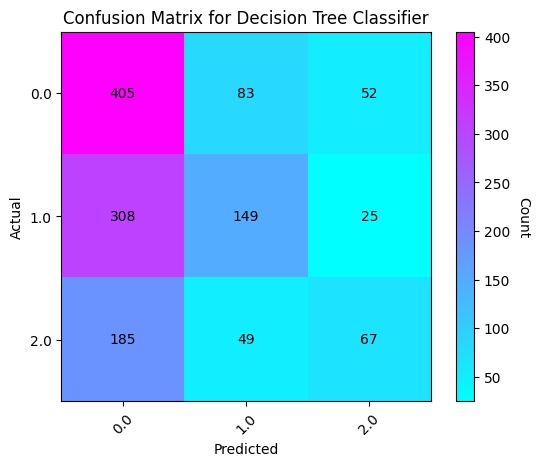

In [ ]:
#Plotting a confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap="cool")

#Creating tick labels
tick_labels = np.arange(len(class_labels))
ax.set_xticks(tick_labels)
ax.set_yticks(tick_labels)
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

#Adding colourbar for visual indication
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")

#Adding values
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    text = ax.text(j, i, int(confusion_matrix[i, j]), ha="center", va="center", color="black")

plt.title("Confusion Matrix for Decision Tree Classifier")

## Random Forest

In [ ]:
#Creating a random forest classifier object
random_forest = RandomForestClassifier()

#Fitting random forest classifier to training data
rf_model = random_forest.fit(train_df)

In [ ]:
#Creating predictions for testing data
rf_prediction = rf_model.transform(test_df)

#Viewing predictions
rf_prediction.select('label', 'prediction', 'probability').show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  1.0|       0.0|[0.43408878316534...|
|  1.0|       1.0|[0.38510676555301...|
|  0.0|       0.0|[0.42563294379342...|
|  1.0|       0.0|[0.42070051062726...|
|  1.0|       0.0|[0.42070051062726...|
|  1.0|       1.0|[0.38412567808256...|
|  2.0|       0.0|[0.42922412214763...|
|  2.0|       0.0|[0.42922412214763...|
|  1.0|       1.0|[0.39180880771540...|
|  0.0|       0.0|[0.44329314711082...|
+-----+----------+--------------------+
only showing top 10 rows



### Evaluation

In [ ]:
multi_evaluator = MulticlassClassificationEvaluator()
predictionAndLabels = rf_prediction.select("prediction", "label").rdd
multiclass_metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = multiclass_metrics.confusionMatrix().toArray()

In [ ]:
#Calculating metrics for each possible class
class_labels = test_df.select("label").distinct().rdd.flatMap(lambda x: x).collect()
metrics = {}

for label in class_labels:
  multi_evaluator.setMetricName("accuracy")
  multi_evaluator.setMetricLabel(label)
  accuracy = multi_evaluator.evaluate(rf_prediction)
  print("\n Accuracy: ", accuracy)

  multi_evaluator.setMetricName("weightedPrecision")
  multi_evaluator.setMetricLabel(label)
  precision = multi_evaluator.evaluate(rf_prediction)
  print("Precision: ", precision)

  multi_evaluator.setMetricName("weightedRecall")
  multi_evaluator.setMetricLabel(label)
  recall = multi_evaluator.evaluate(rf_prediction)
  print("Recall: ", recall)

  multi_evaluator.setMetricName("weightedFMeasure")
  multi_evaluator.setMetricLabel(label)
  f1_score = multi_evaluator.evaluate(rf_prediction)
  print("F1 Score: ", f1_score)

  metrics[label] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1_score}


 Accuracy:  0.46863189720332576
Precision:  0.47783525620260314
Recall:  0.46863189720332576
F1 Score:  0.4266037404070654

 Accuracy:  0.46863189720332576
Precision:  0.47783525620260314
Recall:  0.46863189720332576
F1 Score:  0.4266037404070654

 Accuracy:  0.46863189720332576
Precision:  0.47783525620260314
Recall:  0.46863189720332576
F1 Score:  0.4266037404070654


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

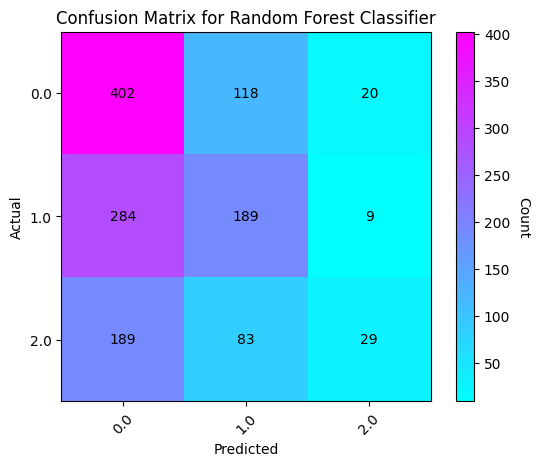

In [ ]:
#Plotting a confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap="cool")

#Creating tick labels
tick_labels = np.arange(len(class_labels))
ax.set_xticks(tick_labels)
ax.set_yticks(tick_labels)
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

#Adding colourbar for visual indication
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")

#Adding values
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    text = ax.text(j, i, int(confusion_matrix[i, j]), ha="center", va="center", color="black")

plt.title("Confusion Matrix for Random Forest Classifier")

## Logistic Regression

In [ ]:
#Creating a logistic regression classifier object
logistic_regression = LogisticRegression()

#Fitting logistic regression classifier to training data
lr_model = logistic_regression.fit(train_df)

In [ ]:
#Creating predictions for testing data
lr_prediction = lr_model.transform(test_df)

#Viewing predictions
lr_prediction.select('label', 'prediction', 'probability').show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  1.0|       0.0|[0.42619577191691...|
|  1.0|       0.0|[0.41791271451769...|
|  0.0|       0.0|[0.42589854861734...|
|  1.0|       0.0|[0.42441834580300...|
|  1.0|       0.0|[0.42335143951906...|
|  1.0|       0.0|[0.41402650574088...|
|  2.0|       0.0|[0.42482544292654...|
|  2.0|       0.0|[0.42454205914733...|
|  1.0|       1.0|[0.40973482498260...|
|  0.0|       0.0|[0.40481897005516...|
+-----+----------+--------------------+
only showing top 10 rows



### Evaluation

In [ ]:
multi_evaluator = MulticlassClassificationEvaluator()
predictionAndLabels = lr_prediction.select("prediction", "label").rdd
multiclass_metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = multiclass_metrics.confusionMatrix().toArray()

In [ ]:
#Calculating metrics for each possible class
class_labels = test_df.select("label").distinct().rdd.flatMap(lambda x: x).collect()
metrics = {}

for label in class_labels:
  multi_evaluator.setMetricName("accuracy")
  multi_evaluator.setMetricLabel(label)
  accuracy = multi_evaluator.evaluate(lr_prediction)
  print("\n Accuracy: ", accuracy)

  multi_evaluator.setMetricName("weightedPrecision")
  multi_evaluator.setMetricLabel(label)
  precision = multi_evaluator.evaluate(lr_prediction)
  print("Precision: ", precision)

  multi_evaluator.setMetricName("weightedRecall")
  multi_evaluator.setMetricLabel(label)
  recall = multi_evaluator.evaluate(lr_prediction)
  print("Recall: ", recall)

  multi_evaluator.setMetricName("weightedFMeasure")
  multi_evaluator.setMetricLabel(label)
  f1_score = multi_evaluator.evaluate(lr_prediction)
  print("F1 Score: ", f1_score)

  metrics[label] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1_score}


 Accuracy:  0.43159486016628873
Precision:  0.34019194040318945
Recall:  0.43159486016628873
F1 Score:  0.34287304911460864

 Accuracy:  0.43159486016628873
Precision:  0.34019194040318945
Recall:  0.43159486016628873
F1 Score:  0.34287304911460864

 Accuracy:  0.43159486016628873
Precision:  0.34019194040318945
Recall:  0.43159486016628873
F1 Score:  0.34287304911460864


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

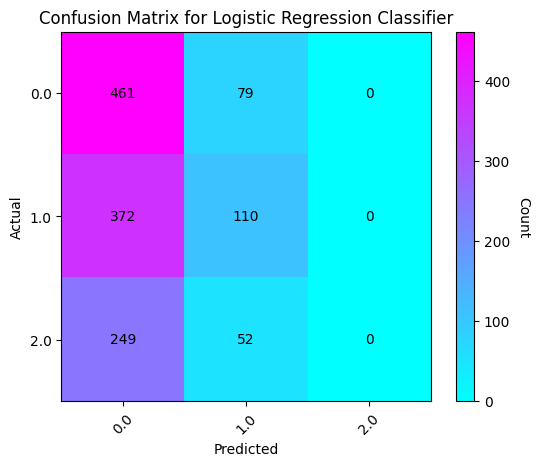

In [ ]:
#Plotting a confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap="cool")

#Creating tick labels
tick_labels = np.arange(len(class_labels))
ax.set_xticks(tick_labels)
ax.set_yticks(tick_labels)
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

#Adding colourbar for visual indication
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")

#Adding values
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    text = ax.text(j, i, int(confusion_matrix[i, j]), ha="center", va="center", color="black")

plt.title("Confusion Matrix for Logistic Regression Classifier")